# **5. Estadística Inferencial**

# **I. Gestión de directorios y archivos en la nube**

La gestión de archivos y directorios en Google Drive es el proceso de organizar, proteger y compartir información digital en la nube, aprovechando sus funciones de colaboración en tiempo real, control de versiones, permisos de acceso y sincronización multiplataforma, lo que facilita el trabajo individual y grupal de manera eficiente.

## 1.1. Montar Google drive a Colaboratory




Montar Google Drive en Colab es el proceso mediante el cual el entorno de ejecución de Colab obtiene acceso autorizado a los archivos de Google Drive, de forma que se pueden leer, escribir y modificar archivos durante la sesión.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'imp'

## 1.2. Explorar contenido de Google Drive

Explorar contenido de Google Drive se refiere a la acción de navegar, buscar, visualizar y gestionar los archivos y carpetas almacenados en Google Drive, la plataforma de almacenamiento en la nube de Google.



In [79]:
def listar_carpeta(ruta_carpeta):
  import os
  ruta_drive ="/content/drive/MyDrive/"
  contenido_carpeta = os.listdir(ruta_drive + ruta_carpeta)
  n_elem = len(contenido_carpeta)

  print(f"Ruta: {ruta_drive + ruta_carpeta}")
  print(f"Numero de elementos: {n_elem}")

  for i in range(n_elem):
    print(f"({i}) {contenido_carpeta[i]}")

La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos`**

In [80]:
listar_carpeta("Base_datos")

Ruta: /content/drive/MyDrive/Base_datos
Numero de elementos: 4
(0) fuente_de_datos.gdoc
(1) shapes
(2) biomedicina
(3) meteorologia


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/biomedicina`**

In [81]:
listar_carpeta("Base_datos/biomedicina")

Ruta: /content/drive/MyDrive/Base_datos/biomedicina
Numero de elementos: 12
(0) datos_abiertos_vigilancia_dengue_2000_2023.csv
(1) datos_abiertos_vigilancia_malaria_2000_2008.csv
(2) datos_abiertos_vigilancia_malaria_2009_2023.csv
(3) Dataset_ExamenesLaboratorio_ConsultaExterna_PatologíasRelacionadas_Diabetes_202001_202404.csv
(4) datos_abiertos_vigilancia_zoonosis_2000_2023.csv
(5) datos_abiertos_vigilancia_iras_2000_2023.csv
(6) datos_abiertos_vigilancia_enfermedad_carrion_2000_2023.csv
(7) pmGenoma_25Septiembre2021.csv
(8) pmGenoma_27Sep2023.csv
(9) TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv
(10) primeras_100_filas_anemia.xlsx
(11) primeras_100_filas_anemia.gsheet


La siguiente celda de código, genera una lista de archivos y directorios contenidos en el directorio ó carpeta **`Base_datos/meteorologia`**

In [82]:
listar_carpeta("Base_datos/meteorologia")

Ruta: /content/drive/MyDrive/Base_datos/meteorologia
Numero de elementos: 1
(0) data_estacion_madrid.xlsx


# **II. Importar base de datos**

## 2.1. Preparar entorno

In [83]:
# Paquete especializado en metodos numericos
import numpy as np

# Paquete especialozado manejo de estructuras de datos tipo tablas (Data Frames)
import pandas as pd

# Paquetes especializado para generar graficas
import seaborn as sns
import matplotlib.pyplot as plt

# Paquete especializados de estadística y metodos numéricos
from scipy import stats

# Paquete especializado en estadística
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 2.2. Archivos en formato EXCEL



Las mediciones de temperatura del aire, humedad relativa y radiación solar (variables ambientales), realizadas por una estación meteorológica en un punto geográfico específico son datos **cuantitativos contínuos**.

In [84]:
excel_data_file = "/content/drive/MyDrive//Base_datos/meteorologia/data_estacion_madrid.xlsx"

In [85]:
# immportando el archivo Excel
df_excel = pd.read_excel(excel_data_file)
print(df_excel)

     Unnamed: 0      fecha  temp_aire         hr   rxn_solar
0             0 2021-01-01   3.625000  73.583333   99.833333
1             1 2021-01-02   1.329167  60.625000   74.333333
2             2 2021-01-03   1.920833  63.958333  101.500000
3             3 2021-01-04   3.433333  57.791667  101.958333
4             4 2021-01-05   0.445833  69.541667  106.666667
..          ...        ...        ...        ...         ...
329         329 2021-11-26   5.562500  69.875000   87.833333
330         330 2021-11-27   5.500000  61.500000   93.041667
331         331 2021-11-28   4.783333  60.291667  117.750000
332         332 2021-11-29  10.112500  61.541667  108.750000
333         333 2021-11-30   6.691667  74.000000  102.958333

[334 rows x 5 columns]


In [86]:
data_interes = df_excel[[ "rxn_solar", "hr", "temp_aire"]]
print(data_interes)

      rxn_solar         hr  temp_aire
0     99.833333  73.583333   3.625000
1     74.333333  60.625000   1.329167
2    101.500000  63.958333   1.920833
3    101.958333  57.791667   3.433333
4    106.666667  69.541667   0.445833
..          ...        ...        ...
329   87.833333  69.875000   5.562500
330   93.041667  61.500000   5.500000
331  117.750000  60.291667   4.783333
332  108.750000  61.541667  10.112500
333  102.958333  74.000000   6.691667

[334 rows x 3 columns]


## 2.3. Archivos en formato CSV

Importar archivos en formato CSV (Comma-Separated Values, o Valores Separados por Comas) consiste en el proceso de cargar o transferir datos almacenados en un archivo CSV a un programa, aplicación o base de datos para su procesamiento, análisis o almacenamiento. Un archivo CSV es un formato de texto plano que organiza datos en filas y columnas, donde los valores están separados por comas (u otros delimitadores, como punto y coma o tabulaciones) y cada fila representa un registro.

In [87]:
csv_data_file = "/content/drive/My Drive/Base_datos/biomedicina/TB_DIGTEL_ANEMIA_TRATAMIENTOS.csv"

df_csv = pd.read_csv(csv_data_file)
print(df_csv)

       Sexo  id_persona  Edad Tipo_edad  id_ubigeo  Fecha_atencion    Etapa  \
0         F    41031388    20         A        NaN        20230208  18a-29a   
1         F    40489600     2         A     1128.0        20230107  00a-11a   
2         M    40315865     1         A        NaN        20230207  00a-11a   
3         F    38917347    19         D     1460.0        20210511  00a-11a   
4         M    40507941     3         A     1668.0        20230224  00a-11a   
...     ...         ...   ...       ...        ...             ...      ...   
248888    M     9206744     6         A     1631.0        20230119  00a-11a   
248889    M    25824229     4         A      163.0        20210528  00a-11a   
248890    F    19472530     6         A     1161.0        20230107  00a-11a   
248891    F    33840534     4         A      242.0        20210412  00a-11a   
248892    F    19486739    84         A     1703.0        20230525     60a+   

        Diagnostico Tipo_Dx  Lab  id_eess  
0      

# **III. Modelo de regresión lineal simple**

El modelo de regresión lineal simple (RLS) busca modelar la relación lineal entre una variable independiente (X) y una variable dependiente (Y) mediante la ecuación {eq}`eq:regresionLinealSimple`

$$ Y = \beta_1 X +\beta_0+ \epsilon $$(eq:regresionLinealSimple)

Donde:

$Y$ es el valor observado de la **variable dependiente**.
$\beta_1 X + \beta_0$ es el **valor predicho** de la variable dependiente por el modelo ($\hat{Y}$), y finalmente, $\epsilon$ es el **error residual**.




El **error residual** representa la parte de la variabilidad en la variable dependiente que no es explicada por el modelo. Idealmente, para un buen modelo, los residuos deberían ser pequeños, aleatorios y no mostrar patrones sistemáticos.

En un modelo de regresión lineal simple, el **error residual** ($\epsilon$) es la diferencia entre el valor observado de la variable dependiente ($Y$) y el valor predicho por el modelo ($\hat{Y}$), ecuación {eq}`eq:errorResidual`.

$$\epsilon = Y - \hat{Y}$$(eq:errorResidual)


Reducir el error residual implica mejorar la capacidad del modelo para predecir la variable dependiente. Aquí hay algunas estrategias, aplicables a tus datos si los supuestos no se cumplen completamente:

**Verificar y Abordar los Supuestos del Modelo**

 Es crucial examinar los supuestos de la regresión lineal. Si alguno de lo supuestos no se cumple, la precisión del modelo y la magnitud de los residuos pueden verse afectadas. Los supuesto que se debe cumplir son los siguientes:

    *   Linealidad
    *   Independencia de los Errores (Autocorrelación)
    *   Homocedasticidad
    *   Normalidad de los Residuos
    *   Ausencia de valores atípicos (outliers)

In [88]:
# Definir conjunto de variables

tiempo = df_excel["fecha"]
temp_prom = df_excel["temp_aire"]
hr = df_excel["hr"]
rxn = df_excel["rxn_solar"]

## 3.1. Linealidad


**Descripción:**

La relación entre la variable independiente ($X$) y dependiente ($Y$) debe ser lineal.

**Implicación de Incumplimiento:**

El modelo lineal no capturará correctamente la verdadera relación, resultando en predicciones poco fiables.


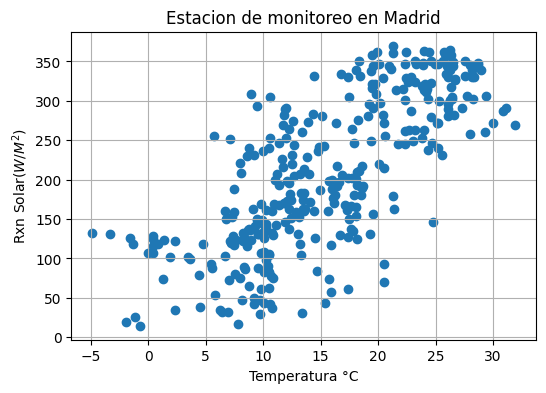

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

axes.scatter(temp_prom, rxn)
axes.set_xlabel("Temperatura °C")
axes.set_ylabel(r"Rxn Solar$(W/M^{2})$")
axes.set_title("Estacion de monitoreo en Madrid")
axes.grid(True)
plt.show()

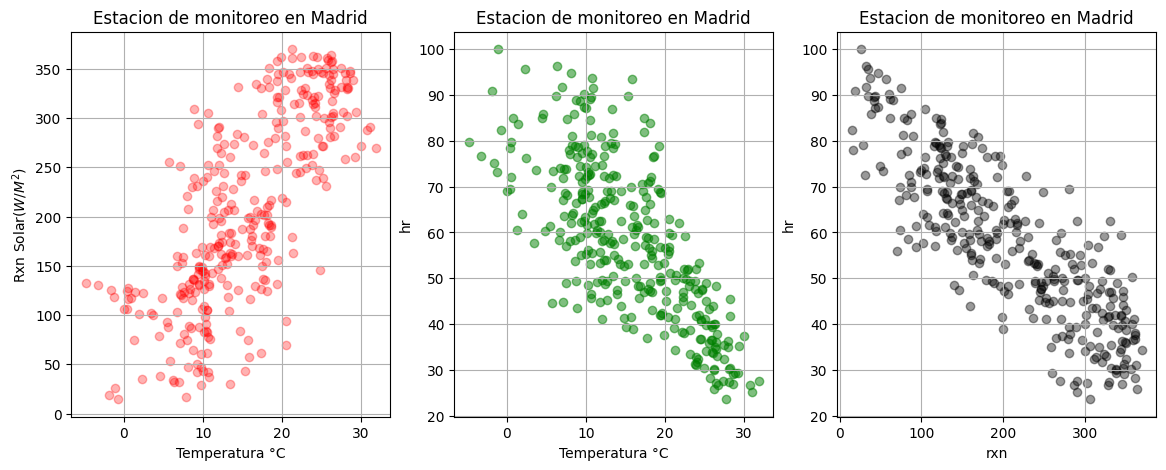

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
fig.subplots_adjust(hspace=0.06)

ax[0].scatter(temp_prom, rxn, c="r", alpha=0.3)
ax[0].set_xlabel("Temperatura °C")
ax[0].set_ylabel(r"Rxn Solar$(W/M^{2})$")
ax[0].set_title("Estacion de monitoreo en Madrid")
ax[0].grid(True)

ax[1].scatter(temp_prom, hr, c="green", alpha=0.5)
ax[1].set_xlabel("Temperatura °C")
ax[1].set_ylabel(r"hr")
ax[1].set_title("Estacion de monitoreo en Madrid")
ax[1].grid(True)

ax[2].scatter(rxn, hr, c="black", alpha=0.4)
ax[2].set_xlabel(r"rxn")
ax[2].set_ylabel("hr")
ax[2].set_title("Estacion de monitoreo en Madrid")
ax[2].grid(True)

 Si el gráfico de dispersión entre `rxn` y `temp_prom` no muestra una relación claramente lineal, podrías considerar transformaciones de las variables (por ejemplo, logaritmos, raíces cuadradas) o modelos no lineales si la relación subyacente es curvilínea.

## 3.2. Independencia de las observaciones

 **Descripción:**

 Los errores (residuos) deben ser independientes entre sí, es decir, no debe haber correlación entre ellos.

 **Implicación de Incumplimento:**

 Si hay autocorrelación (común en series de tiempo), la precisión de los coeficientes y las pruebas de hipótesis se ve afectada.


### Prueba de Hipótesis de Durbin-Watson

La prueba de Durbin-Watson es una prueba estadística que se utiliza para detectar la presencia de **autocorrelación** en los residuos de un análisis de regresión.

**¿Qué es la Autocorrelación?**

La autocorrelación ocurre cuando los residuos de un modelo de regresión no son independientes entre sí, sino que están correlacionados secuencialmente. Esto es particularmente común en datos de series de tiempo (como tus datos meteorológicos) donde una observación en un momento dado puede estar relacionada con observaciones anteriores o posteriores.

**Descripción de la Prueba:**

El estadístico de Durbin-Watson ($d$) se calcula a partir de los residuos del modelo de regresión. El valor de $d$ siempre estará entre 0 y 4.

*   **Valores cercanos a 2:** Indican que no hay autocorrelación en los residuos. Este es el escenario ideal para los supuestos de la regresión lineal.
*   **Valores significativamente menores que 2 (típicamente por debajo de 1.5):** Sugieren **autocorrelación positiva**. Esto significa que un residuo positivo tiende a ser seguido por otro residuo positivo, y un residuo negativo tiende a ser seguido por otro residuo negativo.
*   **Valores significativamente mayores que 2 (típicamente por encima de 2.5):** Sugieren **autocorrelación negativa**. Esto significa que un residuo positivo tiende a ser seguido por un residuo negativo, y viceversa.

**¿Para qué sirve la Prueba de Durbin-Watson?**

La prueba de Durbin-Watson es importante porque la autocorrelación en los residuos viola uno de los supuestos clave de la regresión lineal clásica: la independencia de los errores.

Si hay autocorrelación y no se aborda:

*   Las estimaciones de los coeficientes de regresión ($\beta_0$, $\beta_1$) seguirán siendo insesgadas, pero **no serán eficientes** (tendrán una mayor varianza).
*   Los errores estándar de los coeficientes estarán **subestimados** si hay autocorrelación positiva o **sobreestimados** si hay autocorrelación negativa.
*   Esto lleva a que los intervalos de confianza sean demasiado estrechos (en caso de autocorrelación positiva) o demasiado amplios (en caso de autocorrelación negativa), y a que las pruebas de hipótesis (p-valores) sean incorrectas, lo que puede llevar a conclusiones erróneas sobre la significancia estadística de las variables predictoras.

En resumen, la prueba de Durbin-Watson te ayuda a diagnosticar un problema potencial en tu modelo de regresión (la autocorrelación de los residuos) que puede afectar la validez de tus inferencias estadísticas.

In [91]:
def pruebaHipotesis_durbinWatson(resultado):
  # Calculate the Durbin-Watson statistic
  durbin_watson_statistic = sm.stats.durbin_watson(resultado.resid)

  print(f"Estadístico Durbin-Watson: {durbin_watson_statistic}")

  if durbin_watson_statistic < 1.5:
    print("Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.")
  elif durbin_watson_statistic > 2.5:
    print("Estadístico Durbin-Watson statistic mayor que 2.5: autocorrelación negativa.")
  else:
    print("Estadístico Durbin-Watson entre 1.5 y 2.5: autocorrelación no significativa.")

In [123]:
# Fit a simple linear regression model
modelo_rxn_temp = smf.ols('rxn_solar ~ temp_aire', data=df_excel).fit()

In [125]:
print(modelo_rxn_temp.summary())

                            OLS Regression Results                            
Dep. Variable:              rxn_solar   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     417.5
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.15e-60
Time:                        20:58:36   Log-Likelihood:                -1862.3
No. Observations:                 334   AIC:                             3729.
Df Residuals:                     332   BIC:                             3736.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.1267      7.960      7.679      0.0

In [94]:
print(modelo_rxn_temp.params["Intercept"])
print(modelo_rxn_temp.params["temp_prom"])

61.12665376323768
9.387255379972135


In [95]:
pruebaHipotesis_durbinWatson(modelo_rxn_temp)

Estadístico Durbin-Watson: 0.8018175807839815
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


El estadístico Durbin-Watson determina autocorrelación positiva. Para series de tiempo como datos meteorológicos, esto es común. Se pdría considerar modelos de series de tiempo que tengan en cuenta esta dependencia temporal (por ejemplo, modelos AR, MA, ARMA, ARIMA)

In [96]:
# Fit a simple linear regression model for hr vs rxn
model_hr_rxn = smf.ols('hr ~ rxn_solar', data=df_excel).fit()

In [97]:
pruebaHipotesis_durbinWatson(model_hr_rxn)

Estadístico Durbin-Watson: 0.8993755341695832
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


In [98]:
# Fit a simple linear regression model for hr vs temp_prom
model_hr_temp = smf.ols('hr ~ temp_aire', data=df_excel).fit()

In [99]:
pruebaHipotesis_durbinWatson(model_hr_temp)

Estadístico Durbin-Watson: 0.590678731081639
Estadístico Durbin-Watson statistico menor que 1.5: autocorrelación positiva.


## 3.3. Ausencia de valores atípicos

Los outliers pueden afectar significativamente el modelo

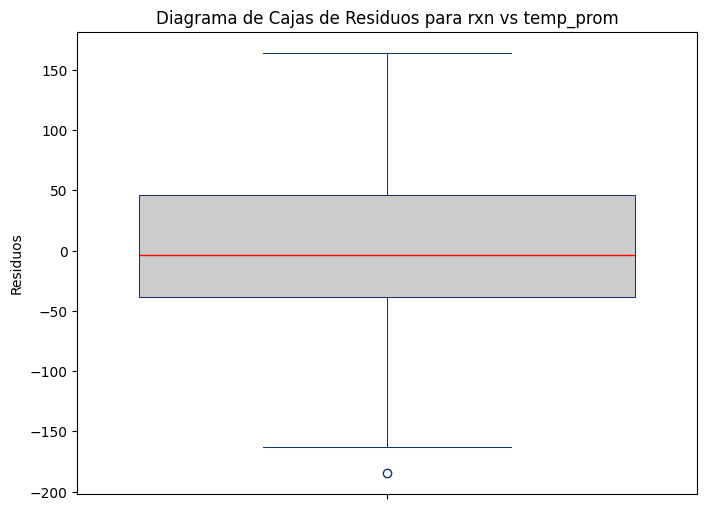

In [100]:
# Create a box plot of the residuals
plt.figure(figsize=(8, 6))
sns.boxplot(y=modelo_rxn_temp.resid,
            fill=True, color=".8", linecolor="#137",
            linewidth=.75,
            flierprops={"marker": "o"},
            medianprops={"color": "r", "linewidth": 1},)

plt.ylabel("Residuos")
plt.title("Diagrama de Cajas de Residuos para rxn vs temp_prom")
plt.show()

##  3.4. Normalidad de los residuos

**Descripción:**

Los errores (residuos) deben seguir una distribución normal (o Gaussiana) con media cero.

**Implicación de Incumplimiento:**

Importante para la inferencia estadística (pruebas t, intervalos de confianza). Menos crítico para la predicción si el tamaño de la muestra es grande.

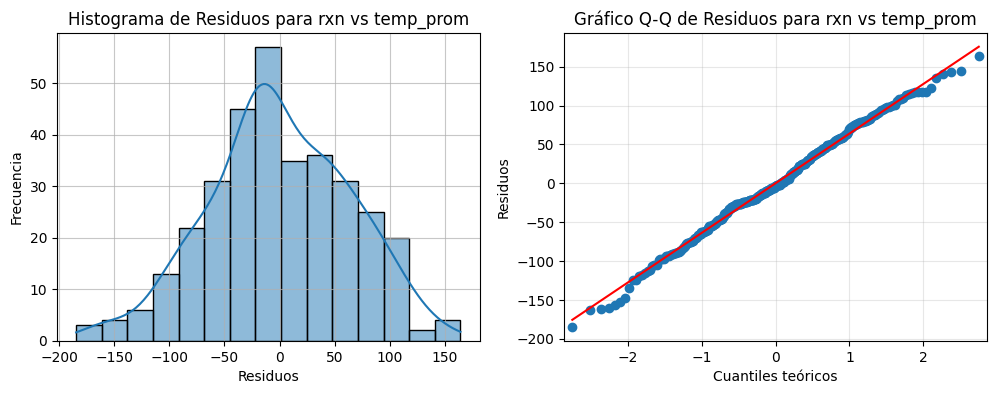

In [101]:
# Crear gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos observados y recta ajustada
sns.histplot(modelo_rxn_temp.resid, kde=True, ax=axes[0])
axes[0].set_xlabel('Residuos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title("Histograma de Residuos para rxn vs temp_prom")
axes[0].grid(alpha=0.7)

# Gráfico 2: Residuos
sm.qqplot(modelo_rxn_temp.resid, line='s', ax=axes[1])
axes[1].set_xlabel('Cuantiles teóricos')
axes[1].set_ylabel('Residuos')
axes[1].set_title("Gráfico Q-Q de Residuos para rxn vs temp_prom")
axes[1].grid(alpha=0.3)

# Ajustar diseño y mostrar
#plt.tight_layout()
plt.show()

In [102]:
datos_no_normal = np.random.exponential(scale=20, size=500) # scale(media)=10, sd=10, size(tamaño) = 5000

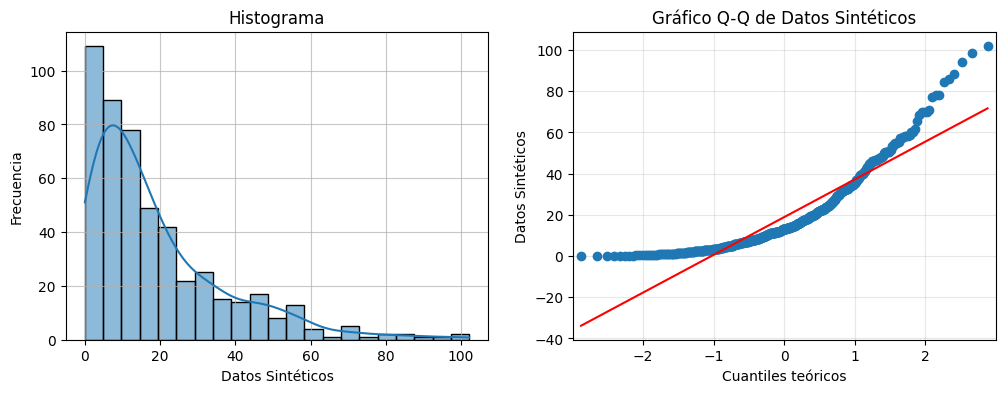

In [103]:
# Crear gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos observados y recta ajustada
sns.histplot(datos_no_normal, kde=True, ax=axes[0])
axes[0].set_xlabel('Datos Sintéticos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title("Histograma")
axes[0].grid(alpha=0.7)

# Gráfico 2: Residuos
sm.qqplot(datos_no_normal, line='s', ax=axes[1])
axes[1].set_xlabel('Cuantiles teóricos')
axes[1].set_ylabel('Datos Sintéticos')
axes[1].set_title("Gráfico Q-Q de Datos Sintéticos")
axes[1].grid(alpha=0.3)

# Ajustar diseño y mostrar
#plt.tight_layout()
plt.show()

## 3.5. Homocedasticidad

**Descripción:**

La varianza de los errores (residuos) debe ser constante para todos los valores de la variable independiente ($X$).

**Implicación de Incumplimiento:**

La varianza de los errores cambia (heterocedasticidad), lo que puede distorsionar los intervalos de confianza y las pruebas de hipótesis.

Análisis e Interpretación del Gráfico de Residuos vs. Valores Ajustados

El gráfico de dispersión de Residuos vs. Valores Ajustados (`Residuos` en el eje Y y `Valores Ajustados` en el eje X) que acabas de generar es una herramienta visual clave para evaluar el supuesto de **homocedasticidad** en un modelo de regresión lineal.

**Homocedasticidad:** Este supuesto establece que la varianza de los errores (residuos) debe ser constante para todos los niveles de la variable independiente o, en este caso, para todos los valores predichos por el modelo.

**Interpretación del Gráfico:**

*   **Si el supuesto de homocedasticidad se cumple:** Los puntos en el gráfico de residuos vs. valores ajustados deberían mostrar una dispersión aleatoria alrededor de la línea horizontal en cero, sin ningún patrón discernible. La "nube" de puntos debería tener un ancho aproximadamente constante a lo largo del eje X.

*   **Si el supuesto de homocedasticidad NO se cumple (Heterocedasticidad):** Los puntos mostrarán un patrón sistemático. Los patrones comunes que indican heterocedasticidad incluyen:
    *   **Forma de Cono (ensanchándose o estrechándose):** Si la dispersión de los residuos aumenta o disminuye a medida que aumentan los valores ajustados, sugiere heterocedasticidad. Un "cono" que se ensancha hacia la derecha indica que la varianza del error aumenta con los valores predichos, mientras que un cono que se estrecha indica que disminuye.
    *   **Otras formas:** Patrones curvilíneos o agrupaciones también pueden indicar heterocedasticidad.

**Implicaciones de la Heterocedasticidad:**

Si el supuesto de homocedasticidad se viola y existe heterocedasticidad:

*   Las estimaciones de los coeficientes de regresión siguen siendo insesgadas, pero **no son eficientes** (tienen una mayor varianza).
*   Los errores estándar de los coeficientes estarán **sesgados**, lo que invalida las pruebas de hipótesis (p-valores) y los intervalos de confianza. Esto significa que podrías concluir erróneamente que una variable es estadísticamente significativa (o no) o que tus intervalos de confianza son más precisos de lo que realmente son.

**Posibles Pasos a Seguir si hay Heterocedasticidad:**

Si el gráfico sugiere heterocedasticidad, podrías considerar:

1.  **Transformaciones de la variable dependiente:** Aplicar una transformación matemática a la variable dependiente (`rxn`), como el logaritmo o la raíz cuadrada, a veces puede ayudar a estabilizar la varianza.
2.  **Regresión Robusta:** Utilizar métodos de regresión robusta que no asumen homocedasticidad.
3.  **Errores Estándar Robusto (White Standard Errors):** En `statsmodels`, puedes usar errores estándar robustos que corrigen la heterocedasticidad sin necesidad de transformar los datos o cambiar el modelo. Esto corrige los errores estándar y, por lo tanto, las pruebas de hipótesis y los intervalos de confianza, aunque no mejora la eficiencia de las estimaciones de los coeficientes.

Si el gráfico de residuos vs. valores ajustados muestra un patrón (forma de cono, por ejemplo), indica heterocedasticidad. Esto significa que la varianza de los errores no es constante. Puedes intentar transformaciones de la variable dependiente o usar métodos de regresión robusta.

In [104]:
# Configurar semilla para reproducibilidad
np.random.seed(42)

# Generar datos sintéticos
n = 100  # Número de puntos
x = np.linspace(0, 10, n)  # Variable independiente
beta_0 = 2.0  # Intercepto
beta_1 = 3.0  # Pendiente

# Generar errores con heterocedasticidad (varianza creciente con x)
error_scale = 0.5 * x  # Escala de la varianza proporcional a x
errors = np.random.normal(0, error_scale, n)  # Errores con distribución normal

# Generar variable dependiente
y = beta_0 + beta_1 * x + errors  # Modelo lineal con errores

# crear data frame
df_xy = pd.DataFrame()
df_xy["x"] = x
df_xy["y"] = y
print(df_xy.head(n=5))

         x         y
0  0.00000  2.000000
1  0.10101  2.296047
2  0.20202  2.671484
3  0.30303  3.139853
4  0.40404  3.164818


In [105]:
# Ajustar modelo de regresión lineal
modelo_xy = smf.ols('y ~ x', data=df_xy).fit()

beta_1 = modelo_xy.params["x"]
beta_0 = modelo_xy.params["Intercept"]

y_pred =  beta_1 * x + beta_0 # Valores predichos
residuals = modelo_xy.resid

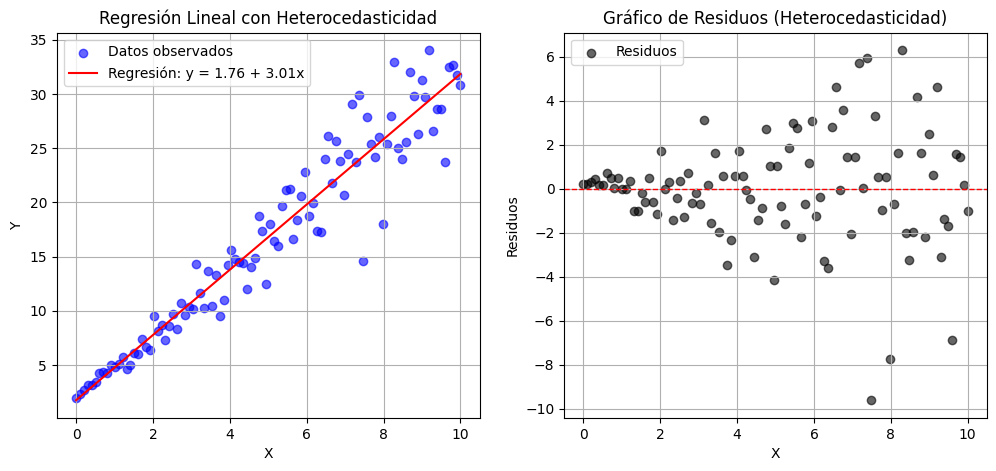

In [106]:
# Crear gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos observados y recta ajustada
ax[0].scatter(x, y, color='blue', label='Datos observados', alpha=0.6)
ax[0].plot(x, y_pred, color='red', label=f'Regresión: y = {beta_0:.2f} + {beta_1:.2f}x')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Regresión Lineal con Heterocedasticidad')
ax[0].legend()
ax[0].grid(True)

# Gráfico 2: Residuos
ax[1].scatter(x, residuals, marker='o',color='k', label='Residuos', alpha=0.6)
ax[1].axhline(0, color='red', linestyle='--', linewidth=1)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Residuos')
ax[1].set_title('Gráfico de Residuos (Heterocedasticidad)')
ax[1].legend()
ax[1].grid(True)

# Ajustar diseño y mostrar
#plt.tight_layout()
plt.show()

In [107]:
# Fijar semilla para reproducibilidad
np.random.seed(42)

# Parámetros del modelo
n = 100  # Número de observaciones
beta_0 = 5  # Intercepto
beta_1 = 2  # Pendiente
sigma = 3  # Desviación estándar del error (homocedasticidad)

# Generar datos sintéticos
X = np.random.uniform(0, 10, n)  # Variable independiente (uniforme entre 0 y 10)
epsilon = np.random.normal(0, sigma, n)  # Errores homocedásticos
Y = beta_0 + beta_1 * X + epsilon  # Variable dependiente

# crear data frame
df_XY = pd.DataFrame()
df_XY["X"] = X
df_XY["Y"] = Y

In [108]:
# Ajustar modelo de regresión lineal
modelo_XY = smf.ols('Y ~ X', data=df_XY).fit()

BETA_1 = modelo_XY.params["X"]
BETA_0 = modelo_XY.params["Intercept"]

Y_pred = modelo_XY.params["Intercept"] + modelo_XY.params["X"] * X  # Valores predichos
residuals = modelo_XY.resid

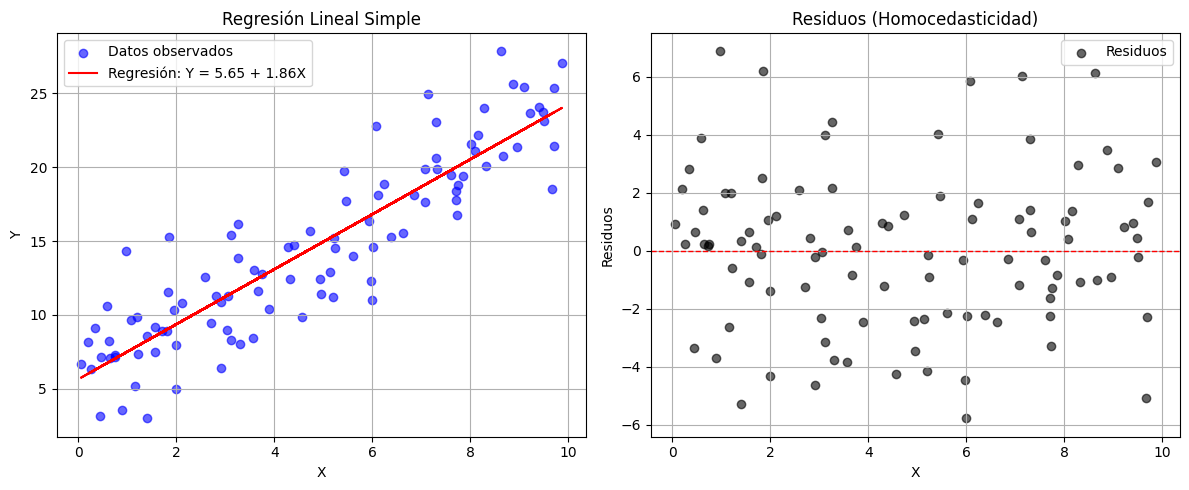

In [109]:
# Graficar datos observados y línea de regresión
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos y línea de regresión
ax[0].scatter(X, Y, color='blue', label='Datos observados', alpha=0.6)
ax[0].plot(X, Y_pred, color='red', label=f'Regresión: Y = {BETA_0:.2f} + {BETA_1:.2f}X')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Regresión Lineal Simple')
ax[0].legend()
ax[0].grid(True)

# Gráfico 2: Residuos para verificar homocedasticidad
ax[1].scatter(X, residuals, marker='o',color='k', label='Residuos', alpha=0.6)
ax[1].axhline(y=0, color='red', linestyle='--', linewidth=1)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Residuos')
ax[1].set_title('Residuos (Homocedasticidad)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

**Análisis de `rxn` vs `temp_prom`:**

Observando el gráfico que generaste (`aacb917b`), fíjate en la distribución de los puntos. Si la dispersión de los residuos no es uniforme a lo largo de los valores ajustados, esto sugiere que la varianza de los errores no es constante. Por ejemplo, si los residuos son más dispersos para valores ajustados altos que para valores ajustados bajos (formando una especie de cono que se abre hacia la derecha), indicaría heterocedasticidad.

In [114]:
# Obtener residuos y valores ajustados del modelo
residuos = modelo_rxn_temp.resid
valores_ajustado = modelo_rxn_temp.fittedvalues

In [126]:
pendiente = modelo_rxn_temp.params["temp_aire"]
coeficiente = modelo_rxn_temp.params["Intercept"]

y_pred =  pendiente * df_excel["temp_aire"] + coeficiente # Valores predichos

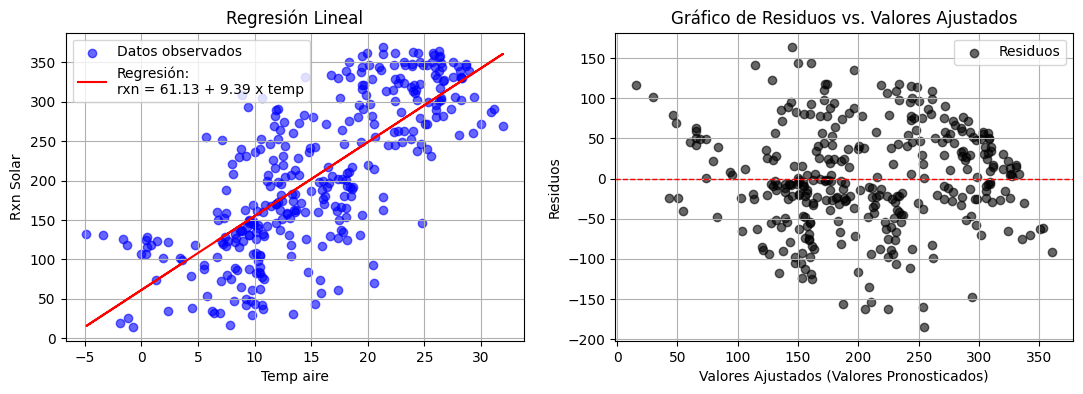

In [133]:
# Crear gráficos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))
fig.subplots_adjust(hspace=0.06)

# Gráfico 1: Datos observados y recta ajustada
ax[0].scatter(df_excel["temp_aire"], df_excel["rxn_solar"], color='blue', label='Datos observados', alpha=0.6)
ax[0].plot(df_excel["temp_aire"], y_pred, color='red', label=f'Regresión:\nrxn = {coeficiente:.2f} + {pendiente:.2f} x temp')
ax[0].set_xlabel('Temp aire')
ax[0].set_ylabel('Rxn Solar')
ax[0].set_title('Regresión Lineal')
ax[0].legend()
ax[0].grid(True)

# Gráfico 2: Residuos
ax[1].scatter(valores_ajustado, residuos, marker='o',color='k', label='Residuos', alpha=0.6)
ax[1].axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Valores Ajustados (Valores Pronosticados)")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados")
ax[1].legend()
ax[1].grid(True)

# Ajustar diseño y mostrar
#plt.tight_layout()
plt.show()